In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
X = load_boston().data
Y = load_boston().target

In [27]:
X_tr, X_te, y_tr, y_te = train_test_split(X, Y, test_size=.33)

In [28]:
scaler = preprocessing.StandardScaler().fit(X_tr)
X_tr = scaler.transform(X_tr)
X_te = scaler.transform(X_te)

## 1. Custom SGD implementation

In [8]:
from CustomSGD import CustomSGDLinearRegressor

In [29]:
model = CustomSGDLinearRegressor(learning_rate = .5, iters = 1000, k_rand_points = 200)

### 1.1 Finding best weights using <font color='red'>CustomSGD</font>

In [30]:
model.fit(X_tr, y_tr)

print('Custom SGD Weights:\n\n', model.w)

print('\nCustom SGD MSE:', mean_squared_error(y_te, model.predict(X_te)))

Custom SGD Weights:

 [-0.67796777  0.27914837 -0.13018815  0.85701209 -1.53798326  2.58514403
  0.201977   -2.53930014  1.58416541 -1.38003649 -2.39228809  1.00307428
 -3.64134263]

Custom SGD MSE: 23.947724550898204


### 1.2 Plotting Actual vs Predicted values for CustomSGD

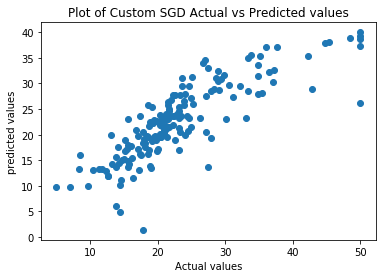

In [31]:
plt.scatter(y_te, model.predict(X_te))
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.title('Plot of Custom SGD Actual vs Predicted values')
plt.show()

## 2. SKLearn SGDRegressor

In [17]:
clf = SGDRegressor()

### 2.1 Finding best weights using SKLearn SGDRegressor

In [32]:
clf.fit(X_tr, y_tr)

print('SKLearn\'s SGD Regressor Weights:\n\n', clf.coef_)

print('\nSKLearn\'s SGD Regressor MSE:', mean_squared_error(y_te, clf.predict(X_te)))

SKLearn's SGD Regressor Weights:

 [-0.51507549  0.15384585 -0.55098183  1.00002078 -1.0547996   2.92528677
 -0.19841909 -2.13388238  0.43514506 -0.27309477 -1.95955553  1.03340787
 -3.57247566]

SKLearn's SGD Regressor MSE: 24.450244903458447


### 1.2 Plotting Actual vs Predicted values for SKLearn SGDRegressor

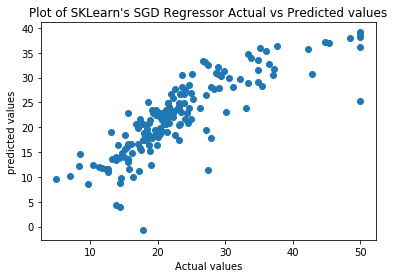

In [33]:
plt.scatter(y_te, clf.predict(X_te))
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.title('Plot of SKLearn\'s SGD Regressor Actual vs Predicted values')
plt.show()

## 3. Weights of SGDRegressor vs CustomSGD

In [34]:
pt = PrettyTable()
pt.field_names = ['Component of Weight', 'SKLearn SGDRegressor', 'Custom SGD']

for idx, weights in enumerate(zip(clf.coef_, model.w)):
    pt.add_row([ idx+1, *weights ])

print(pt)

+---------------------+----------------------+----------------------+
| Component of Weight | SKLearn SGDRegressor |      Custom SGD      |
+---------------------+----------------------+----------------------+
|          1          | -0.5150754938577538  |  -0.677967774101397  |
|          2          |  0.1538458484281107  | 0.27914836938416304  |
|          3          | -0.5509818262940747  | -0.13018815427881325 |
|          4          |  1.0000207754000592  |  0.8570120882428679  |
|          5          | -1.0547996015071233  | -1.5379832550180295  |
|          6          |  2.9252867725452507  |  2.5851440300896598  |
|          7          | -0.19841908953431675 | 0.20197699709218694  |
|          8          | -2.1338823819741997  |  -2.539300143380268  |
|          9          | 0.43514505950173926  |  1.5841654111003285  |
|          10         | -0.2730947717690514  | -1.3800364875984614  |
|          11         | -1.9595555310611272  |  -2.392288094039652  |
|          12       

## 4. Mean Squared Error of SGDRegressor vs CustomSGD

In [35]:
pt = PrettyTable()

pt.field_names = ['Metric', 'SKLearn SGDRegressor', 'Custom SGDLinearRegressor']

pt.add_row(['MSE', mean_squared_error(y_te, clf.predict(X_te)), mean_squared_error(y_te, model.predict(X_te))])

print(pt)

+--------+----------------------+---------------------------+
| Metric | SKLearn SGDRegressor | Custom SGDLinearRegressor |
+--------+----------------------+---------------------------+
|  MSE   |  24.450244903458447  |     23.947724550898204    |
+--------+----------------------+---------------------------+
